# D. Visualization with Pandas


We previously learned `pandas` is a Python library used for data analytics.
Being a data analytics tool, you can use it not for data processing, but also dor drawing charts and plots on your data in DataFrame or Series.

So, we will take a glance at how to you can visualize your Series and DataFrame using pandas.

### _Objective_
- **Pandas DataFrame Visualization**: Learning how to visualize data in pandas DataFrame using pandas.

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

# \[1. Visualization with `pandas` \]

#### Example Data) Changes in exam performance over 3 years

In [2]:
scores = np.array([
    [83, 85, 84, 81, 80, 85, 84, 81, 79, 75, 76, 74],
    [86, 90, 91, 89, 92, 90, 87, 85, 87, 84, 82, 80],
    [73, 78, 82, 87, 92, 96, 95, 93, 94, 96, 97, 98]])
score_df = pd.DataFrame(scores, 
                         columns = ['1-1mid', '1-1final', '1-2mid', '1-2final', 
                                    '2-1mid', '2-1final', '2-2mid', '2-2final',
                                    '3-1mid', '3-1final', '3-2mid', '3-2fianl'],
                        index = ['Science', 'English', 'Math'])
display(score_df)

,1-1mid,1-1final,1-2mid,1-2final,2-1mid,2-1final,2-2mid,2-2final,3-1mid,3-1final,3-2mid,3-2fianl
Science,83,85,84,81,80,85,84,81,79,75,76,74
English,86,90,91,89,92,90,87,85,87,84,82,80
Math,73,78,82,87,92,96,95,93,94,96,97,98


## 1. Drawing Basic Charts with `.plot()`
`.plot()` is a method used for drawing a simple chart for DataFrame.

In [3]:
# Switch rows and columns
score_df = score_df.T
score_df

,Science,English,Math
1-1mid,83,86,73
1-1final,85,90,78
1-2mid,84,91,82
1-2final,81,89,87
2-1mid,80,92,92
2-1final,85,90,96
2-2mid,84,87,95
2-2final,81,85,93
3-1mid,79,87,94
3-1final,75,84,96


### (1) Drawing  a simple line plot

You can draw a simple line plot for your data by applying `.plot()` to your DataFrame.<br>
Here, DataFrame rows are set to the x-axis and columns to the y-axis.

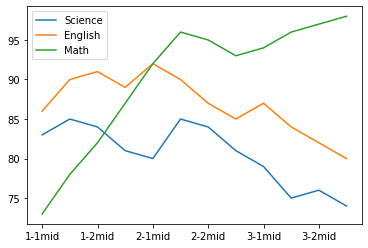

In [4]:
ax = score_df.plot()
plt.show()

Or, if you want to draw a plot only for science scores, you can do like as follows.

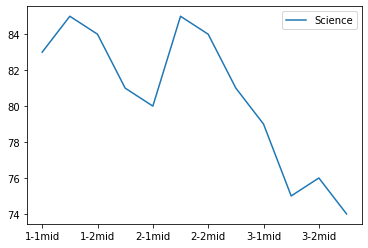

In [5]:
score_df.plot(y="Science")
plt.show()

### (2) Adding Title and Axis Labels and Ticks to Chart 

You can customize chart elements by passing arguments to `.plot()`.

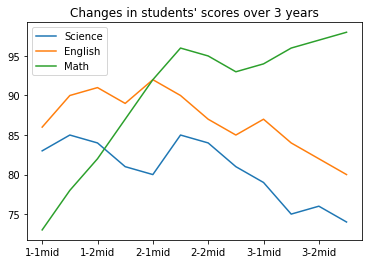

In [6]:
# Setting title and ticks 
score_df.plot(title="Changes in students' scores over 3 years",
              xticks=np.arange(0,12,2)) 
plt.show()

You can set a title of the rows and columns with `.index.name`.

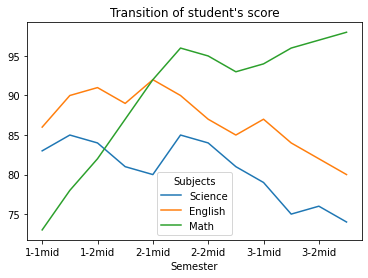

In [7]:
# Titling rows and columns of `score_df`
score_df.columns.name = "Subjects" # setting title of columns
score_df.index.name = "Semester" # setting title of rows

score_df.plot(title="Transition of student's score", # setting a title to use for the plot
              xticks=np.arange(0,12,2)) # setting tick locations
plt.show()

### (3) Drawing a subplot

So far, we've drawn multiple plots on a single layout when displaying multiple variables.  
However, what should we do if we want each plot per frame?  
Then, drawing separate subplots for each column would be the solution.  

By setting `subplots = True` in `.plot()`,  
the figure frame will be split into `n(the number of variables)` frames in equal size to draw `n` line plots.

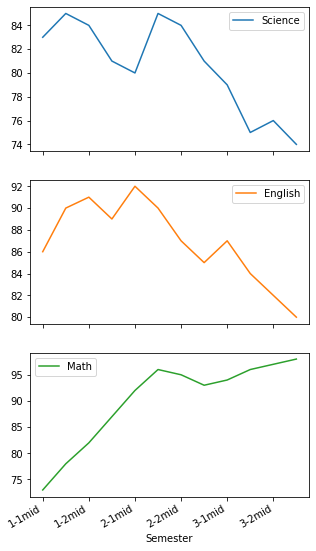

In [8]:
subplots = score_df.plot(subplots=True,
                         figsize=(5,10))
plt.show()

### (4) Setting legend and the value limits of axes

If you want to leave out a legend from the plot and set the range of y values, set them accordingly to `legend` and `ylim` parameters.

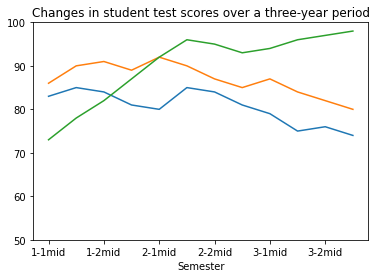

In [9]:
score_df.plot(title="Changes in student test scores over a three-year period",
              legend=False, # removing the legend 
              ylim=(50,100)) # setting the minimum and maximum values respectively at 50 and 100 
plt.show()

## 2. Drawing Advanced Types of Charts

You can draw other types of charts with `.plot()` by specifying the chart type to the `kind` parameter. 


####  Example Data)  midterm exam report cards

In [10]:
middle_scores = np.array([
    [80,92,70,65,92],
    [91,75,90,68,85],
    [86,76,42,72,88],
    [77,92,52,60,80],
    [75,85,85,92,95],
    [96,90,95,81,72]
])

df = pd.DataFrame(middle_scores, columns = ['History' , 'English',  'Math', 'Social_Studies', 'Science' ])
df

,History,English,Math,Social_Studies,Science
0,80,92,70,65,92
1,91,75,90,68,85
2,86,76,42,72,88
3,77,92,52,60,80
4,75,85,85,92,95
5,96,90,95,81,72


### (1) Drawing a bar chart with pandas

As mentioned in the previous section, a bar chart is a useful chart type for visualizing a categorical variable.  
To draw a bar chart, you have to pass `kind = "bar"` to `.plot()`. 

From the below code, you get a bar chart displaying the exam scores for 5 subjects per student.

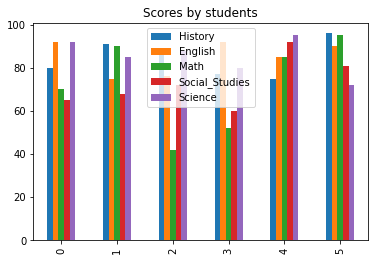

In [11]:
df.plot(
    kind="bar",
    title="Scores by students")
plt.show()

If you intend to draw a bar chart only for specific columns, pass the name of columns to the `y` parameter.  
In this example, let's draw bars for Math and Science.

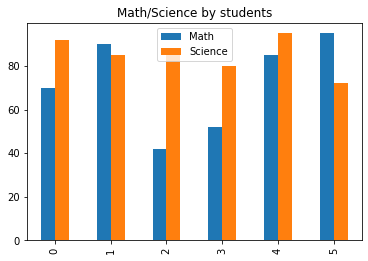

In [12]:
df.plot(
    kind="bar",
    y=['Math','Science'], # drawing bars for scores in Math and Science.
    title="Math/Science by students")
plt.show()

### (2) Drawing a pie chart with pandas

If you want to compare the weight of categories in data(i.e. what percentages each category takes up out of all),  
draw a pie chart by passing `kind = "pie"` to `.plot()`. 

We'll see how the overall score of each student is made up of.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F48BF4BB0>,
      dtype=object)

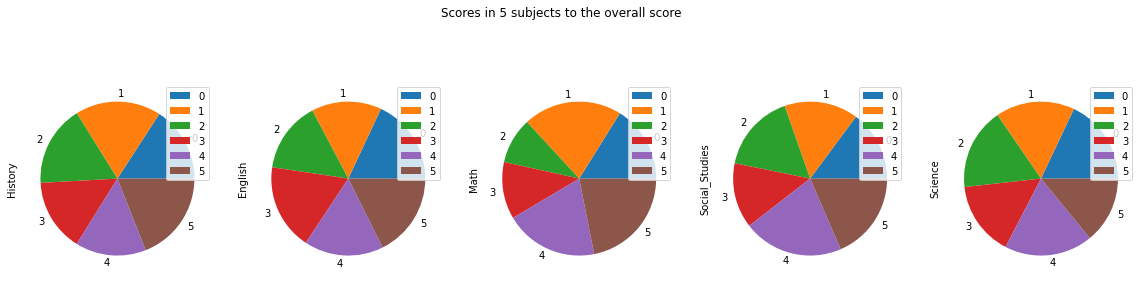

In [13]:
df.plot(kind="pie",
        subplots=True,
        title="Scores in 5 subjects to the overall score",
        figsize=(20,5))

If you want to draw a pie chart only for scores for particular subjects or students, select only the sets of data you want to visualize before applying `.plot()`.

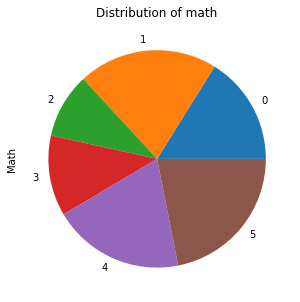

In [14]:
df['Math'].plot(kind="pie", # drawing a pie chart for math scores
        title="Distribution of math",
        figsize=(20,5))

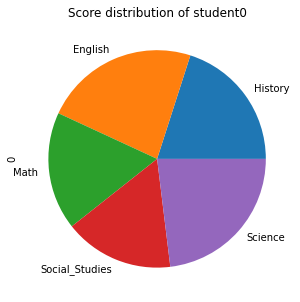

In [15]:
df.loc[0].plot( # pie chart on the scores of student 0
    kind="pie",
    title="Score distribution of student0",
    figsize=(20,5))

#### Example Data) student exam scores in Math and Science

In [16]:
math_scores = np.array([
       62, 80, 68, 61, 69, 62, 71, 84, 68, 71, 60, 72, 69, 78, 64, 73, 67,
       68, 58, 69, 64, 72, 59, 56, 60, 60, 78, 63, 68, 72, 72, 72, 70, 73,
       68, 55, 77, 73, 81, 71, 68, 63, 76, 76, 66, 70, 72, 67, 74, 66, 77,
       75, 68, 60, 71, 74, 78, 78, 69, 75, 71, 79, 75, 88, 81, 74, 85, 73,
       64, 78, 81, 68, 70, 62, 60, 69, 62, 81, 77, 85, 66, 68, 63, 81, 80,
       71, 78, 61, 70, 68, 69, 57, 64, 64, 65, 74, 69, 60, 75, 69, 66, 62,
       60, 75, 71, 63, 79, 62, 86, 86, 81, 74, 65, 71, 81, 67, 75, 77, 52,
       65, 68, 64, 60, 56, 67, 58, 83, 50, 77, 74, 76, 69, 69, 65, 64, 76,
       64, 74, 77, 66, 62, 46, 54, 69, 59, 55, 64, 71, 60, 95, 66, 76, 77,
       70, 61, 88, 55, 89, 76, 78, 68, 65, 65, 75, 79, 61, 65, 71, 81, 79,
       72, 77, 85, 58, 74, 83, 62, 77, 58, 61, 60, 74, 76, 64, 61, 63, 71,
       81, 57, 74, 75, 62, 59, 58, 53, 69, 83, 58, 58, 58, 65, 62, 73, 64,
       53, 75, 63, 64, 69, 75, 56, 61, 63, 72, 59, 54, 71, 66, 83, 72, 64
])
science_scores =  np.array([
       71, 77, 64, 55, 60, 64, 70, 87, 69, 76, 60, 80, 60, 72, 66, 69, 60,
       64, 68, 60, 68, 66, 64, 60, 61, 66, 80, 73, 60, 69, 76, 67, 70, 78,
       71, 56, 72, 82, 80, 75, 71, 64, 80, 74, 62, 72, 74, 57, 81, 68, 70,
       85, 63, 69, 70, 82, 83, 83, 67, 72, 69, 88, 70, 90, 83, 76, 79, 72,
       65, 86, 91, 71, 73, 54, 65, 71, 54, 85, 81, 92, 67, 76, 69, 75, 83,
       80, 80, 51, 69, 60, 68, 53, 57, 57, 65, 84, 63, 62, 84, 68, 74, 60,
       53, 67, 81, 69, 72, 56, 77, 91, 74, 78, 73, 69, 84, 67, 79, 74, 43,
       59, 77, 66, 69, 59, 64, 63, 79, 44, 70, 69, 71, 63, 66, 62, 72, 68,
       74, 82, 74, 67, 57, 41, 44, 64, 66, 55, 57, 70, 61, 88, 58, 76, 76,
       64, 54, 90, 65, 80, 70, 79, 75, 70, 58, 83, 75, 60, 66, 72, 75, 88,
       66, 82, 82, 59, 69, 82, 54, 73, 62, 56, 52, 77, 72, 62, 70, 53, 77,
       87, 51, 65, 85, 55, 55, 55, 50, 74, 82, 68, 54, 48, 68, 72, 77, 60,
       52, 66, 54, 54, 68, 73, 54, 53, 63, 74, 49, 50, 81, 59, 73, 78, 55
])

Let's create a DataFrame for exam scores in Math and Science.

In [17]:
df = pd.DataFrame()
df['Science'] = science_scores
df['Math'] = math_scores
df

,Science,Math
0,71,62
1,77,80
2,64,68
3,55,61
4,60,69
...,...,...
216,81,71
217,59,66
218,73,83
219,78,72


### (3) Drawing a histogram with pandas

If you want to draw a histogram with pandas, pass `kind="hist"` to `.plot()`.  

To see the frequency distribution of the science scores, let's plot them on a histogram.

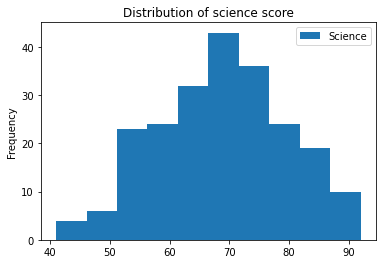

In [18]:
df.plot(kind="hist",
        y='Science',
        title="Distribution of science score")
plt.show()

You can specify the number of bins you want to split the data into by passing a number to the `bins` keyword in `.plot()`.

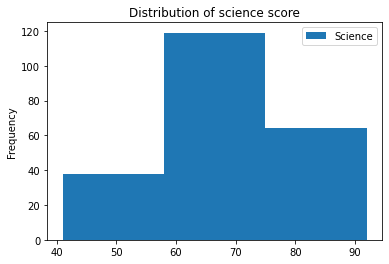

In [19]:
df.plot(kind="hist",
        y='Science',
        bins=3,
        title="Distribution of science score")
plt.show()

### (4) Drawing a scatter plot with pandas

If you want to draw a scatter plot with `.plot()`, pass `"scatter"` to  `kind` in `.plot()`.  
You can examine the correlation between two continuous variables.


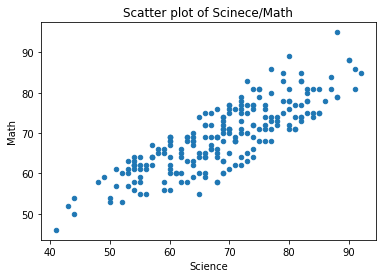

In [20]:
df.plot(x="Science",y="Math",
        kind="scatter",
        title='Scatter plot of Scinece/Math')
plt.show()